<a href="https://colab.research.google.com/github/nguyenvang12003454/AIO_2025_Homework/blob/main/Daily_code_day_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Dataset

In [28]:
! gdown 1zoQTToBtrUu9DWDb64CLq1Zu66NYTMKk

Downloading...
From: https://drive.google.com/uc?id=1zoQTToBtrUu9DWDb64CLq1Zu66NYTMKk
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 13.4MB/s]


In [29]:
import pandas as pd

data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
X_data = data.drop(['Sales'], axis=1)
y_data = data['Sales']

X_data = scaler.fit_transform(X_data)

## Define class Linear Regression

In [45]:
class LinearRegression:
  def __init__(self, lr=0.01, epochs=1000):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.costs = []

  def predict(self, x):
    return np.dot(x, self.weights) + self.bias

  def gradient(self, y_hat, y, x):
    loss = y_hat - y
    dw = np.dot(x.T, loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss ** 2)/(2*len(y))
    return dw, db, cost

  def update_weights(self, dw, db):
    self.weights -= self.lr * dw
    self.bias -= self.lr * db

  def fit(self, X, y):
    self.weights = np.zeros(X.shape[1])
    self.bias = 1
    self.costs = []

    for epochs in range(self.epochs):
      y_hat = self.predict(X)
      dw, db, cost = self.gradient(y_hat, y, X)
      self.costs.append(cost)

      if epochs % 50 == 0:
        print(f'Epoch: {epochs}, Cost: {cost}')

      self.update_weights(dw, db)
  def plot_cost(self):
    plt.figure(figsize=(10, 6))
    plt.plot(self.costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs Epochs')
    plt.show()

Epoch: 0, Cost: 113.725475
Epoch: 50, Cost: 42.270986984848356
Epoch: 100, Cost: 16.301089047300188
Epoch: 150, Cost: 6.828957870761153
Epoch: 200, Cost: 3.3642986207993797
Epoch: 250, Cost: 2.093828606767359
Epoch: 300, Cost: 1.626788552791002
Epoch: 350, Cost: 1.4546176763799286
Epoch: 400, Cost: 1.390929873012838
Epoch: 450, Cost: 1.3672659568117587
Epoch: 500, Cost: 1.3584210332209725
Epoch: 550, Cost: 1.3550886004010865
Epoch: 600, Cost: 1.3538196481248657
Epoch: 650, Cost: 1.3533296560388843
Epoch: 700, Cost: 1.3531370424223292
Epoch: 750, Cost: 1.3530596370712467
Epoch: 800, Cost: 1.353027706724913
Epoch: 850, Cost: 1.3530141424027013
Epoch: 900, Cost: 1.3530081975956834
Epoch: 950, Cost: 1.35300550978008


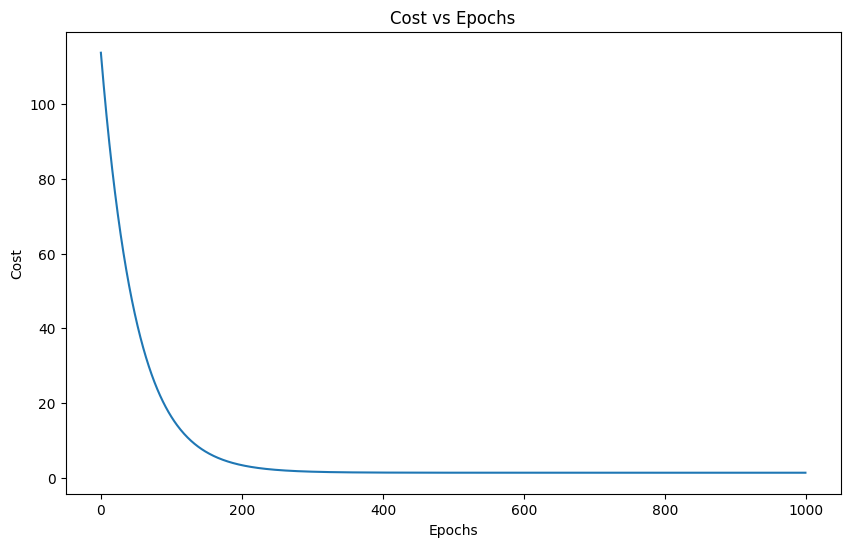

In [46]:
model = LinearRegression(lr = 0.01, epochs = 1000)
model.fit(X_data, y_data)
model.plot_cost()